In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

###Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.
Now, almost every representative has a ?. This represents a no vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.  
So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [9]:
representatives = pd.read_csv("house-votes-84.csv", header=None)

representatives.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


#####Columns:
0. party: 2 (republican, democrat)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)

In [10]:
representatives = representatives.replace('y',1)
representatives = representatives.replace('n',0)
representatives = representatives.replace('?',np.nan)

#replace ? values with the column mean
for column in range(1,17):
    colmean = representatives[column].mean()
    representatives.loc[np.isnan(representatives[column]), column] = colmean

representatives.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


###Challenge 2

Split the data into a test and training set. Use this function: `from sklearn.cross_validation import train_test_split`

In [11]:
from sklearn.cross_validation import train_test_split

X = representatives[range(1,17)]
Y = representatives[0]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.30, random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat) from sklearn.neighbors import KNeighborsClassifier

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy: from sklearn.metrics import accuracy_score

Which k value gives the highest accuracy?

In [12]:
import sklearn
print sklearn.__version__

0.16.1


KNN (n=1) accuracy: 0.9008
KNN (n=2) accuracy: 0.8931
KNN (n=3) accuracy: 0.9008
KNN (n=4) accuracy: 0.9008
KNN (n=5) accuracy: 0.9160
KNN (n=6) accuracy: 0.9313
KNN (n=7) accuracy: 0.9160
KNN (n=8) accuracy: 0.9237
KNN (n=9) accuracy: 0.9313
KNN (n=10) accuracy: 0.9313
KNN (n=11) accuracy: 0.9237
KNN (n=12) accuracy: 0.9237
KNN (n=13) accuracy: 0.9237
KNN (n=14) accuracy: 0.9237
KNN (n=15) accuracy: 0.9237
KNN (n=16) accuracy: 0.9237
KNN (n=17) accuracy: 0.9237
KNN (n=18) accuracy: 0.9160
KNN (n=19) accuracy: 0.9160
KNN max accuracy: 0.9313


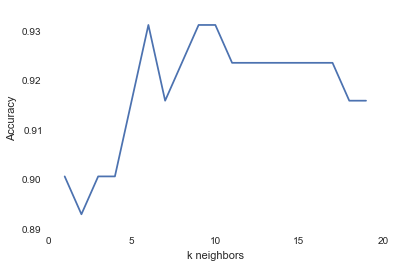

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accs = []
for n in range(1,20):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)
    accs.append(accuracy)
    print 'KNN (n=%i) accuracy: %.4f' % (n,accuracy)

print 'KNN max accuracy: %.4f' % max(accs)
plt.plot(range(1,20), accs)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

#### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
logit_accuracy = accuracy_score(Y_test, Y_test_pred)
print 'Logistic Regression accuracy: %.4f' % logit_accuracy

Logistic Regression accuracy: 0.9389


### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there? Make a very simple predictor that predicts 'democrat' for every incoming example. (Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']) Make a y_predicted vector using this and measure its accuracy. Do the same with predicting 'republican' all the time and measure its accuracy.

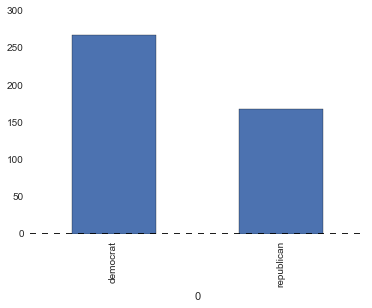

In [22]:
representatives.groupby(0)[0].count().plot(kind='bar')

In [23]:
def baseline_model(X, same_guess="democrat"):
    """guess the same for any input"""
    pred = np.array([same_guess] * len(X))
    return pred

y_pred_democ_baseline = baseline_model(X_test, same_guess='democrat')
democ_accuracy = accuracy_score(Y_test, y_pred_democ_baseline)


y_pred_repub_baseline = baseline_model(X_test, same_guess='republican')
repub_accuracy = accuracy_score(Y_test, y_pred_repub_baseline)


for values in [("democrat", democ_accuracy), ("republican", repub_accuracy)]:
    print 'Baseline %s guess predictor accuracy: %.4f' % values


Baseline democrat guess predictor accuracy: 0.5878
Baseline republican guess predictor accuracy: 0.4122


### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



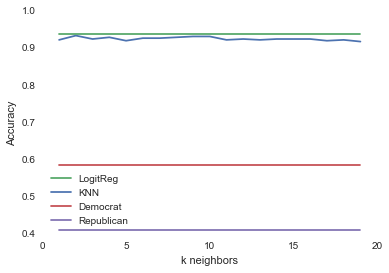

In [24]:
knn, = plt.plot(range(1,20), accs)
logit, = plt.plot(range(1,20), [logit_accuracy]*19)
democ, = plt.plot(range(1,20), [democ_accuracy]*19)
repub, = plt.plot(range(1,20), [repub_accuracy]*19)
plt.legend((logit,knn,democ,repub),
           ("LogitReg","KNN","Democrat", "Republican"),
           loc='best')
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

### Challenge 7

When you found the k value with highest test accuracy in Challenge 3, you used a single test set. Use scikit.learn's cross-validation tools to get a range of accuracies for each k. Using the average cross validation accuracy, does the best k change? Can you imagine cases where it might and might not change?

KNN (n=1) CV accuracy: 0.9240
KNN (n=2) CV accuracy: 0.9355
KNN (n=3) CV accuracy: 0.9263
KNN (n=4) CV accuracy: 0.9309
KNN (n=5) CV accuracy: 0.9217
KNN (n=6) CV accuracy: 0.9286
KNN (n=7) CV accuracy: 0.9286
KNN (n=8) CV accuracy: 0.9309
KNN (n=9) CV accuracy: 0.9332
KNN (n=10) CV accuracy: 0.9332
KNN (n=11) CV accuracy: 0.9240
KNN (n=12) CV accuracy: 0.9263
KNN (n=13) CV accuracy: 0.9240
KNN (n=14) CV accuracy: 0.9263
KNN (n=15) CV accuracy: 0.9263
KNN (n=16) CV accuracy: 0.9263
KNN (n=17) CV accuracy: 0.9217
KNN (n=18) CV accuracy: 0.9240
KNN (n=19) CV accuracy: 0.9194
KNN max CV accuracy: 0.9355


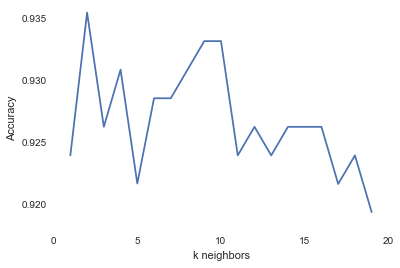

In [25]:
from sklearn.cross_validation import cross_val_score

accs, stds = [], []
for k in range(1,20):
    #7-fold cross validation
    accuracies = cross_val_score(KNeighborsClassifier(k), X,Y, cv=7)
    accuracy = np.mean(accuracies)
    accuracy_std = np.std(accuracies)
    accs.append(accuracy)
    stds.append(accuracy_std)
    print 'KNN (n=%i) CV accuracy: %.4f' % (k,accuracy)

print 'KNN max CV accuracy: %.4f' % max(accs)
plt.plot(range(1,20), accs)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

### Challenge 8
Like in Challenge 6, make a graph of  accuracies for each k value. 
This time, put error bars in your graph, using your results from Challenge 7.
Use the standard deviation of the cross validation accuracy values for each k as its error bar height (for the KNN predictor).

KNN max CV accuracy: 0.9355


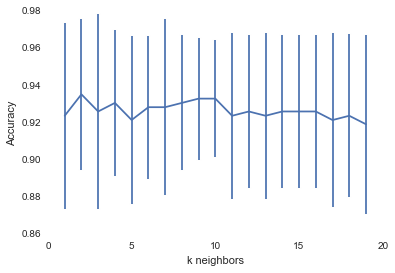

In [26]:
print 'KNN max CV accuracy: %.4f' % max(accs)
plt.errorbar(range(1,20), accs, yerr=stds)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

### Challenges 9 & 10
Calculate the accuracy, precision, recall and f1 scores for the KNN and Logistic Regression classifiers you built. (Use only one KNN, no need to do this for all k values).

In [46]:
X = representatives[range(1,17)]
Y = representatives.replace('democrat',0).replace('republican', 1)[0]

for algorithm in (LogisticRegression, 
                  KNeighborsClassifier):
    for score in ('accuracy',
                 'precision',
                 'recall',
                 'f1'):
        result = np.mean(cross_val_score(algorithm(), X,Y,
                                         scoring=score,
                                         cv=10))
        print '%-30s %-10s:%.4f' % (algorithm.__name__, score, result)

LogisticRegression             accuracy  :0.9582
LogisticRegression             precision :0.9493
LogisticRegression             recall    :0.9463
LogisticRegression             f1        :0.9463
KNeighborsClassifier           accuracy  :0.9283
KNeighborsClassifier           precision :0.8916
KNeighborsClassifier           recall    :0.9397
KNeighborsClassifier           f1        :0.9117


### Extra Challenge A

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0. Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [33]:
# Predict the El Salvador Aid vote (column 5) using the other votes
rep = pd.read_csv('house-votes-84.csv', header=None)
rep = rep.replace('y',1)
rep = rep.replace('n',0)
rep = rep.replace('?',np.nan)

# drop the rows where our outcome vote is missing    
rep = rep[-np.isnan(rep[5])]

# Features: All votes but column 5 (also no column 0-- party)
feature_cols = range(1,5)+range(6,17)

#Replace missing values with the column's mode
for column in feature_cols:
    # This [0] is ugly but pandas mode() returns a DataFrame instead of a value,
    # and we need to take the value in its zeroth column. Uglyish design decision by pandas.
    colmode = rep[column].mode()[0]   
    rep.loc[np.isnan(rep[column]), column] = colmode
    


X = rep[feature_cols]
Y = rep[5]


# Classify with the whole gamut and report accuracy
for algorithm in (LogisticRegression, 
                  KNeighborsClassifier):
    accuracy = np.mean(cross_val_score(algorithm(), X,Y, cv=10))
    print '%-30s %.4f' % (algorithm.__name__, accuracy)

LogisticRegression             0.9545
KNeighborsClassifier           0.9402


### Extra Challenge B

Back to your movie data! The example below is shown on a slightly different data set (column names etc.), but the essence is exactly the same.

Choose one categoric feature to predict. We chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Note: Here I'm loading my movie csv file to make a data frame
# You can work on your own data frame

movies = pd.read_csv('2013_movies.csv', parse_dates={'Date':['ReleaseDate']})
movies = movies.dropna(axis=0, subset=['Budget'])
#movies['Ones'] = 1

movies.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146
1,2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129
2,2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108
3,2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98
4,2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143


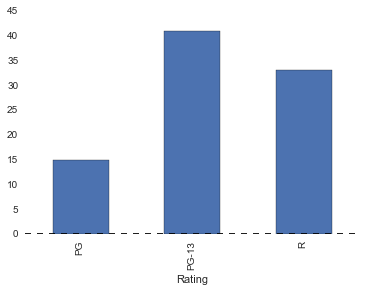

In [36]:
movies.groupby('Rating')['Title'].count().plot(kind='bar')

In [37]:
X = movies[['Runtime','DomesticTotalGross','Budget']]
Y = movies['Rating']

for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
    print 'KNN(k=%i) accuracy: %.3f' % (k,accuracy)

KNN(k=1) accuracy: 0.368
KNN(k=2) accuracy: 0.332
KNN(k=3) accuracy: 0.468
KNN(k=4) accuracy: 0.433
KNN(k=5) accuracy: 0.458
KNN(k=6) accuracy: 0.433
KNN(k=7) accuracy: 0.507
KNN(k=8) accuracy: 0.457
KNN(k=9) accuracy: 0.487
KNN(k=10) accuracy: 0.452
KNN(k=11) accuracy: 0.474
KNN(k=12) accuracy: 0.407
KNN(k=13) accuracy: 0.431
KNN(k=14) accuracy: 0.474
KNN(k=15) accuracy: 0.463
KNN(k=16) accuracy: 0.431
KNN(k=17) accuracy: 0.442
KNN(k=18) accuracy: 0.443
KNN(k=19) accuracy: 0.478
KNN(k=20) accuracy: 0.479
KNN(k=21) accuracy: 0.477
KNN(k=22) accuracy: 0.479
KNN(k=23) accuracy: 0.477
KNN(k=24) accuracy: 0.512
KNN(k=25) accuracy: 0.488
KNN(k=26) accuracy: 0.464
KNN(k=27) accuracy: 0.478
KNN(k=28) accuracy: 0.477
KNN(k=29) accuracy: 0.475


In [38]:
model = LogisticRegression()
accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
print 'Logistic Regression (L2 penalty) accuracy: %.3f' % accuracy

# L1 and L2 are just two different forms of regularization. The form of
# what is added to the cost funtion is slightly different. L2 is default,
# Let's try L1 here, too. Different problems work better with different
# penalty forms.
model = LogisticRegression(penalty='l1')
accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
print 'Logistic Regression (L1 penalty) accuracy: %.3f' % accuracy

# Ok, let's also check different C values. C is just like alpha in Ridge Regression,
# It let's us fine tune how much regularization (how much shrinking) we will do on
# coeefficients. Default C is 1.0. Small C means more shrinking, tends to underfit,
# Large C means less shrinking, tends to overfit.
for C in np.linspace(0.05,100,10):
    model = LogisticRegression(penalty='l1', C=C)
    accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
    print 'Logistic Regression (L1 penalty, C=%.2f) accuracy: %.3f' % (C,accuracy)


Logistic Regression (L2 penalty) accuracy: 0.496
Logistic Regression (L1 penalty) accuracy: 0.531
Logistic Regression (L1 penalty, C=0.05) accuracy: 0.522
Logistic Regression (L1 penalty, C=11.16) accuracy: 0.572
Logistic Regression (L1 penalty, C=22.26) accuracy: 0.572
Logistic Regression (L1 penalty, C=33.37) accuracy: 0.572
Logistic Regression (L1 penalty, C=44.47) accuracy: 0.572
Logistic Regression (L1 penalty, C=55.58) accuracy: 0.572
Logistic Regression (L1 penalty, C=66.68) accuracy: 0.572
Logistic Regression (L1 penalty, C=77.79) accuracy: 0.572
Logistic Regression (L1 penalty, C=88.89) accuracy: 0.572
Logistic Regression (L1 penalty, C=100.00) accuracy: 0.572


In [39]:
def baseline_model(X, same_guess="PG-13"):
    """guess the same for any input"""
    pred = np.array([same_guess] * len(X))
    return pred

# We already showed how to make baseline predictions with a function like
# this (baseline_model) on a test set and calculate 
# the test accuracy in a previous challange.
#
# Here I want to show how to use this with the cross_val_score function.
# That function takes a model instance, like LogisticRegression()
# Scikitlearn models all have a few methods that they are expected to have.
# I will imitate a model class like that for my baseline model.
#
# You don't need to do that, you can do this just like we did in Challenge 5.
# This is extra, showing how to use cross_val_score with a model class of your
# own.
#
# I need to make a class that will behave exactly like a sklearn model
# for this baseline predictor. All it needs is a fit method so you can run
# baseline.fit(X,Y)
# and also a predict method so you can run
# baseline.predict(X)
# It should also have a score method like this:
# baseline.score(X,Y)
# It should also have a get_params method:
# baseline.get_params(deep=True)
# These are the three functions that cross_val_score runs


class Baseline(object):
    
    def __init__(self, guess):
        self.guess = guess
        
    def fit(self, X, Y):
        # Do nothing. This classifier
        # doesn't really train on data,
        # it will only guess the same thing!
        pass
    
    def predict(self, X):
        # create an array full of the exact same
        # guess and return it!
        pred = np.array([self.guess] * len(X))
        return pred        
    
    def score(self, X,Y):
        # Calculate the accuracy of your
        # stupid predictions against the
        # actual values
        Y_pred = self.predict(X)
        Y_true = Y
        return accuracy_score(Y_true, Y_pred)
    
    def get_params(self, deep=False):
        # Scikitlearn models return a dictionary
        # of {parameter: value} with this function
        # We only have one parameter, out guess.
        # You don't even need to worry about the 
        # "deep" kw argument, we're not using it.
        return {'guess': self.guess}
    
# Ok, now that our class has fit, predict, score and get_params
# just as cross_val_score expects, we can run it!
model = Baseline(guess="PG-13")
accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
print 'Baseline PG-13 guess accuracy: %.3f' % accuracy



Baseline PG-13 guess accuracy: 0.457


Well, looks like baseline accuracy is 0.457, but we can hit 0.572 with logistic regression, using budget, gross and runtime as features. This means that these features DO carry information about the rating. KNN accuracy was 0.475, so it barely passed baseline accuracy. You did alright, KNN. Not your best day today, though. But trust me people, sometimes, in some problems, KNN outperforms the smartest, sleekest algorithms.

Let's check coefficients now.

In [40]:
model = LogisticRegression(penalty='l1', C=22)
model.fit(X, Y)

model.coef_

array([[ -1.12601427e-01,   4.17717991e-09,   1.78848156e-08],
       [  2.19316145e-02,  -2.22940551e-09,   1.27062829e-08],
       [  2.04161583e-02,  -1.20136889e-09,  -2.75192374e-08]])

Wait, what, why are there 4 rows and three columns?
Well. LogisticRegression.coef\_ is an array of shape (n_classes, n_features)
So, one row for each class (G,PG,PG-13,R), one column for each feature (runtime, gross, budget).

Why does it have different coefficients for each class?
Because as we saw in class, the model can distinguish only between two classes. So how will it distinguish between multiple classes?
One vs All: For each class, it fits a separate logistic regression model with 2 labels each:  
1)G vs 'not G'
2)PG vs 'not PG'
3)PG-13 vs 'not PG-13'
4)R vs 'not R'

If more than one reports positive (like, 1 says not G, 2 say PG, 3 says PG13, 4 says notR), the winner with the highest confidence level (actualy logistic regression output before the threshold cutoff) is chosen as the predicted class (like, if this example model we mentioned had reported a higher value for PG13 vs 'not PG13' than PG vs 'not PG', PG13 is chosen as prediction).

See http://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest

In [41]:
# print Y to find our which class comes first in the coef_
print Y[:10]
print model.coef_

0     PG-13
1     PG-13
2        PG
3        PG
4     PG-13
5     PG-13
8     PG-13
9        PG
10    PG-13
11    PG-13
Name: Rating, dtype: object
[[ -1.12601427e-01   4.17717991e-09   1.78848156e-08]
 [  2.19316145e-02  -2.22940551e-09   1.27062829e-08]
 [  2.04161583e-02  -1.20136889e-09  -2.75192374e-08]]


Ok, so the 4 rows in coef\_ correspond to, in order, PG-13, G, PG and R.
The 3 columns are runtime, gross, budget.

We can see that for PG-13, gross and budget both increase the confidence substantially.
Budget also increases confidence for PG, but not as much as PG-13, and gross actually has a negative effect on PG confidence, so a huge budget is a sign that this is less likely to be PG.
For R, both budget and gross have negative coefficients, we know those are smaller.
G (which includes many animations) is also guessible from a high budget/high gross, but those increase confidence with less of a boost than they do for PG-13. Long runtimes seem to be lowering confidence in PG-13 or G, but slightly increasing it in PG and R.

### Extra Challenge C

This is a preview of many other classification algorithms. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC

Decision Tree
from sklearn.tree import DecisionTreeClassifier

Random Forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
print 'Naive Bayes (Gaussian) accuracy: %.4f' % accuracy_score(Y_test, Y_test_pred)

Naive Bayes (Gaussian) accuracy: 0.9389


In [36]:
from sklearn.svm import SVC
model = SVC().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
print 'SVM Classifier accuracy: %.4f' % accuracy_score(Y_test, Y_test_pred)

SVM Classifier accuracy: 0.9542


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
print 'Decision Tree accuracy: %.4f' % accuracy_score(Y_test, Y_test_pred)

Decision Tree accuracy: 0.9466


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
print 'Random Forest accuracy: %.4f' % accuracy_score(Y_test, Y_test_pred)

Random Forest accuracy: 0.9618


And let's check these models with the more rigorous cross validation

In [39]:
from sklearn.cross_validation import cross_val_score

names, accs = [],[]
for algorithm in (LogisticRegression, 
                  KNeighborsClassifier,
                  GaussianNB,
                  SVC,
                  DecisionTreeClassifier,
                  RandomForestClassifier):

    accuracy = np.mean(cross_val_score(algorithm(), X,Y, cv=10)) #10-fold cross validation
    print '%-30s %.4f' % (algorithm.__name__, accuracy)
    names.append(algorithm.__name__)
    accs.append(accuracy)

LogisticRegression             0.9545
KNeighborsClassifier           0.9402
GaussianNB                     0.9565
SVC                            0.9616
DecisionTreeClassifier         0.9496
RandomForestClassifier         0.9474


And let's visualize this so we can see it better. Also, high five `[Visualization]` track.

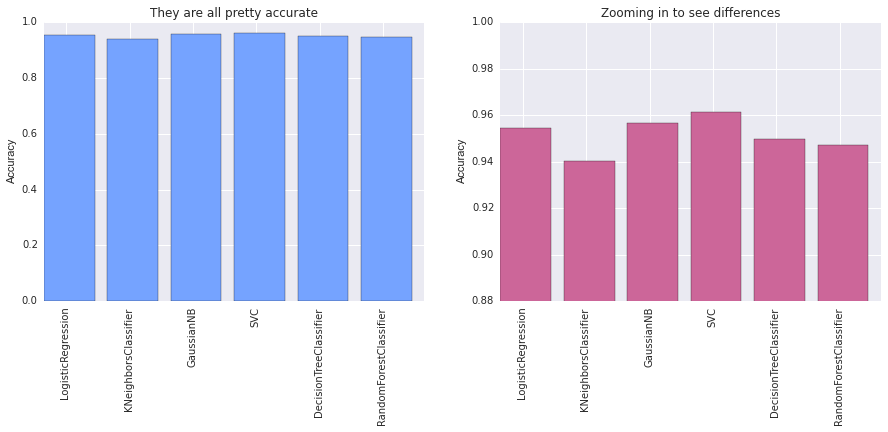

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.bar(range(6), accs, color='#75A3FF')
plt.xticks(np.arange(6)+0.35, names, rotation=90)
plt.ylabel("Accuracy")
plt.title('They are all pretty accurate')

plt.subplot(122)
plt.bar(range(6), accs, color='#CC6699')
plt.xticks(np.arange(6)+0.35, names, rotation=90)
plt.ylim(0.88, 1.0)
plt.ylabel("Accuracy")
plt.title('Zooming in to see differences')

### Extra Challenge D

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data we talked about in class.

What is the average and standard deviation of the age of all of the patients?  
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?  
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.  
What is the earliest year of surgery in this dataset?  
What is the most recent year of surgery?  

Use logistic regression to predict survival after 5 years. How well does your model do?   
What are the coefficients of logistic regression? Which features affect the outcome how?    



In [48]:
patients = pd.read_csv("haberman.csv", header=None)

patients.columns=['age','year','nodes','survived']
patients=patients.replace(2,0)
patients.head()

,age,year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,0,1
4,31,65,4,1


In [49]:
#average and standard deviation of the age of all of the patients?
patients['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

In [50]:
#average and std of the age of those patients that survived 5 or more years after surgery?
patients['age'][patients['survived']==1].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [51]:
#average and std of the age of those patients who survived fewer than 5 years after surgery?
patients['age'][patients['survived']==0].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

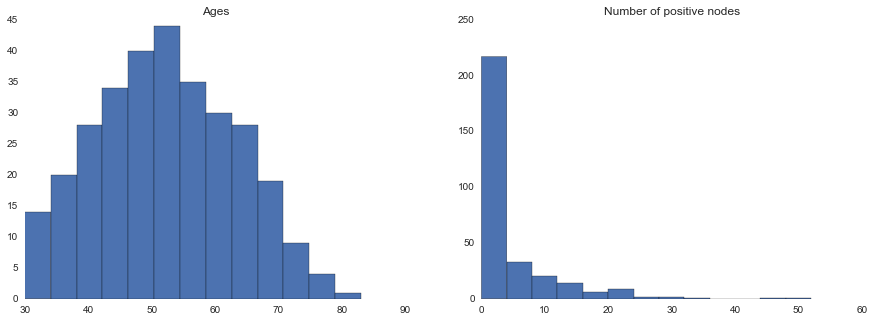

In [52]:
#histogram of the ages side by side with a histogram of the number of axillary nodes
plt.figure(figsize=(15,5))
plt.subplot(121)
patients['age'].hist(bins=13)
plt.title('Ages')
plt.subplot(122)
patients['nodes'].hist(bins=13)
plt.title('Number of positive nodes')

In [53]:
#earliest year of surgery in this dataset?
patients['year'].min()

58

In [54]:
#the most recent year of surgery?
patients['year'].max()

69

In [55]:
#Use logistic regression to predict survival after 5 years. How well does your model do?
X = patients[['age','year','nodes']]
Y = patients['survived']
model = LogisticRegression()
accuracy = np.mean(cross_val_score(model, X,Y, cv=10))
print 'Logistic Regression accuracy: %.3f' % accuracy

Logistic Regression accuracy: 0.752


In [56]:
#What are the coefficients of logistic regression? Which features affect the outcome how?
model.fit(X,Y).coef_

array([[-0.01854801,  0.03455384, -0.08687346]])

Age coefficient is negative. Being older decreases the chance of survival.
Year coeff. is positive (technology develops, makes sense). With each additional year, chances of survival increase. This effect is about twice as strong as the age effect. (Every year you age one year but technology advances, too, and the overall effect is positive!)
Positive lyph nodes coeff. is understandably negative, and is the most powerful predictor among the others. More cancerous nodes means lower chance of survival.